In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Loading dataset
data = pd.read_csv(, encoding='latin-1')
data.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Dropping unwanted columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [4]:
# Naming the columns
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data.describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# Calculating the length of all the messages
data['length'] = data['message'].apply(len)
data.head()
%matplotlib inline

<Axes: ylabel='Frequency'>

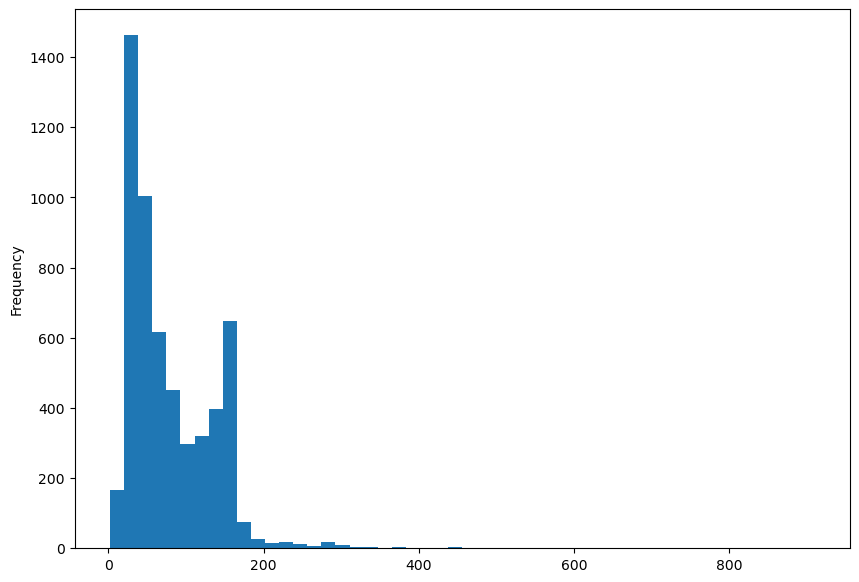

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

data['length'].plot(bins=50, kind='hist',figsize=(10,7))


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

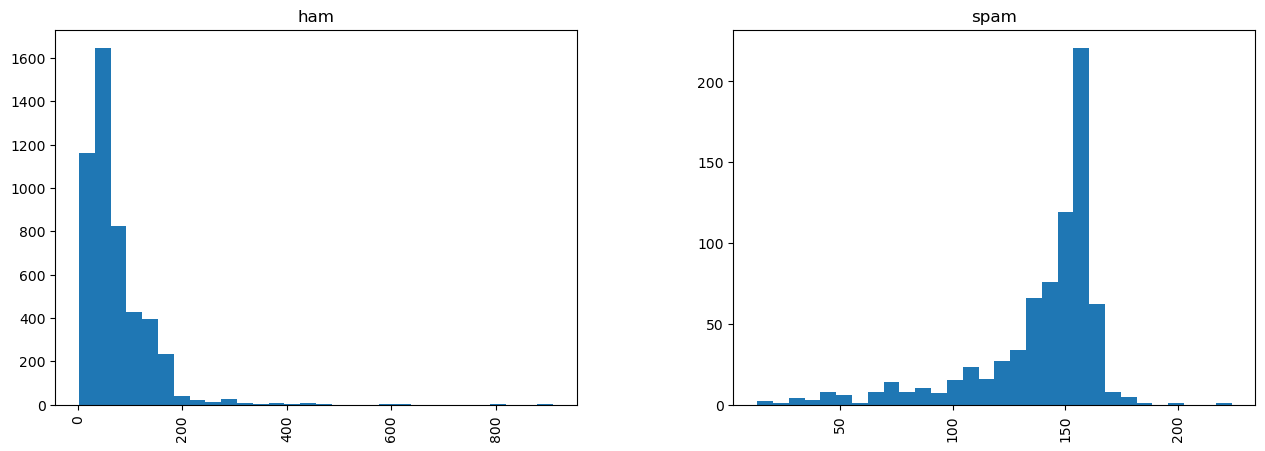

In [6]:
# Plotting the length of ham and spam messages
data.hist(by='label', column='length', bins=30, figsize=[15, 5])

In [7]:
# Converting our labels to numeric labels (ham = 0 and spam = 1)
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})
data.head()



,label,message,length,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [8]:
# Loading our features and target to train
x = data.message
y = data.label_num


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)


In [11]:
vect = CountVectorizer()


In [12]:
# Converting features into numeric vector
X_train = vect.fit_transform(x_train)

# Converting target into numeric vector
X_test = vect.transform(x_test)

In [13]:
# Loading classifiers
svc = SVC(kernel='linear')
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100, random_state=11)

In [14]:
# Defining functions for training and testing data
def training(clf, x_train, Y_train):
    clf.fit(x_train, Y_train)

# Function for predicting labels
def predict(clf, X_test):
    return clf.predict(X_test)

In [15]:
# Defining a dictionary of classifiers
classifier = {'SVM': svc, 'logistic': lr, 'RandomForest': rfc}

# Predict and store the score of each classifier
score = []


In [16]:

for n, c in classifier.items():
    training(c, X_train.toarray(), y_train)
    pred = predict(c, X_test.toarray())
    score.append((n, [accuracy_score(y_test, pred, normalize=True)]))


In [20]:
# Adding accuracy column
score_df = pd.DataFrame(score, columns=['Classifier', 'scores']).set_index('Classifier')
score_df['Accuracy (%)'] = score_df['scores'] * 100
score_df

,scores,Accuracy (%)
Classifier,,
SVM,[0.9892318736539842],"[0.9892318736539842, 0.9892318736539842, 0.989..."
logistic,[0.9870782483847811],"[0.9870782483847811, 0.9870782483847811, 0.987..."
RandomForest,[0.9856424982053122],"[0.9856424982053122, 0.9856424982053122, 0.985..."
